# chapter4 파이토치 기본

### 4.2 역전파

#### 4.2.1 그래디언트 텐서

In [2]:
import torch
x = torch.ones(2,2,requires_grad=True) # 해당 텐서를 기준으로 모든 연산들을 추적하여 그래디언트를 계산
y = x+1
z = 2*y**2
r = z.mean()
print('result: ', r)

result:  tensor(8., grad_fn=<MeanBackward0>)


In [3]:
r.backward() # 역전파를 진행하겠다 (dr/dx를 계산한다)
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


#### 4.2.2 자동미분 + 선형회귀식

In [4]:
import torch
from matplotlib import pyplot as plt
x = torch.FloatTensor(range(5)).unsqueeze(1) # 1번째 위치의 차원을 늘려준다. 그래서 x의 크기는 최종적으로 torch.Size(5,1)
y = 2*x +torch.rand(5,1)
num_features = x.shape[1] # x.Szie([5,1])이므로 인스턴스의 개수가 5개, 피처의 개수가 1개인 데이터


In [5]:
w = torch.randn(num_features, 1, requires_grad=True) # 5*1데이터와 곱할 수 있어야 하므로 w는 1(피처수)*1(출력값 크기)인 배열로 정의하자
b = torch.randn(1, requires_grad=True) # 마찬가지로 1인 텐서

In [6]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b],lr=learning_rate)

In [8]:
loss_stack =[]
for epoch in range(1001):
    optimizer.zero_grad()
    y_hat = torch.matmul(x,w) + b
    loss = torch.mean((y_hat-y)**2)
    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())

    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:0.08571088314056396
Epoch 100:0.07838866859674454
Epoch 200:0.07189048826694489
Epoch 300:0.06612376123666763
Epoch 400:0.0610060915350914
Epoch 500:0.05646473169326782
Epoch 600:0.052434224635362625
Epoch 700:0.048857416957616806
Epoch 800:0.04568322002887726
Epoch 900:0.04286627843976021
Epoch 1000:0.04036641865968704


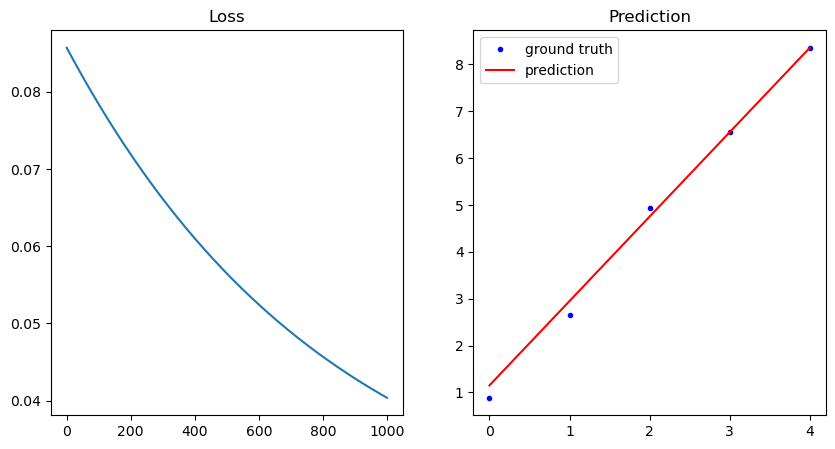

In [10]:
with torch.no_grad(): # requires_grad 비활성화
    y_hat = torch.matmul(x,w) +b

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title('Prediction')
plt.show()

### 4.3 데이터 불러오기

In [12]:
import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

In [13]:
transf = tr.Compose([tr.Resize(16),tr.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transf)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download = True, transform = transf)

100%|██████████| 170498071/170498071 [00:27<00:00, 6121594.41it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [14]:
print(trainset[0][0].size())

torch.Size([3, 16, 16])


In [15]:
trainloader = DataLoader(trainset, batch_size = 50, shuffle = True)
testloader = DataLoader(testset, batch_size = 50, shuffle= True)

len(trainloader)

1000

In [21]:
images, labels = next(iter(trainloader))
print(images.size())

torch.Size([50, 3, 16, 16])


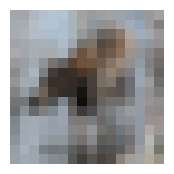

In [24]:
oneshot = images[1].permute(1,2,0).numpy()
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

#### 4.3.3 정리되지 않은 커스텀 데이터 불러오기